# Contingency Tables

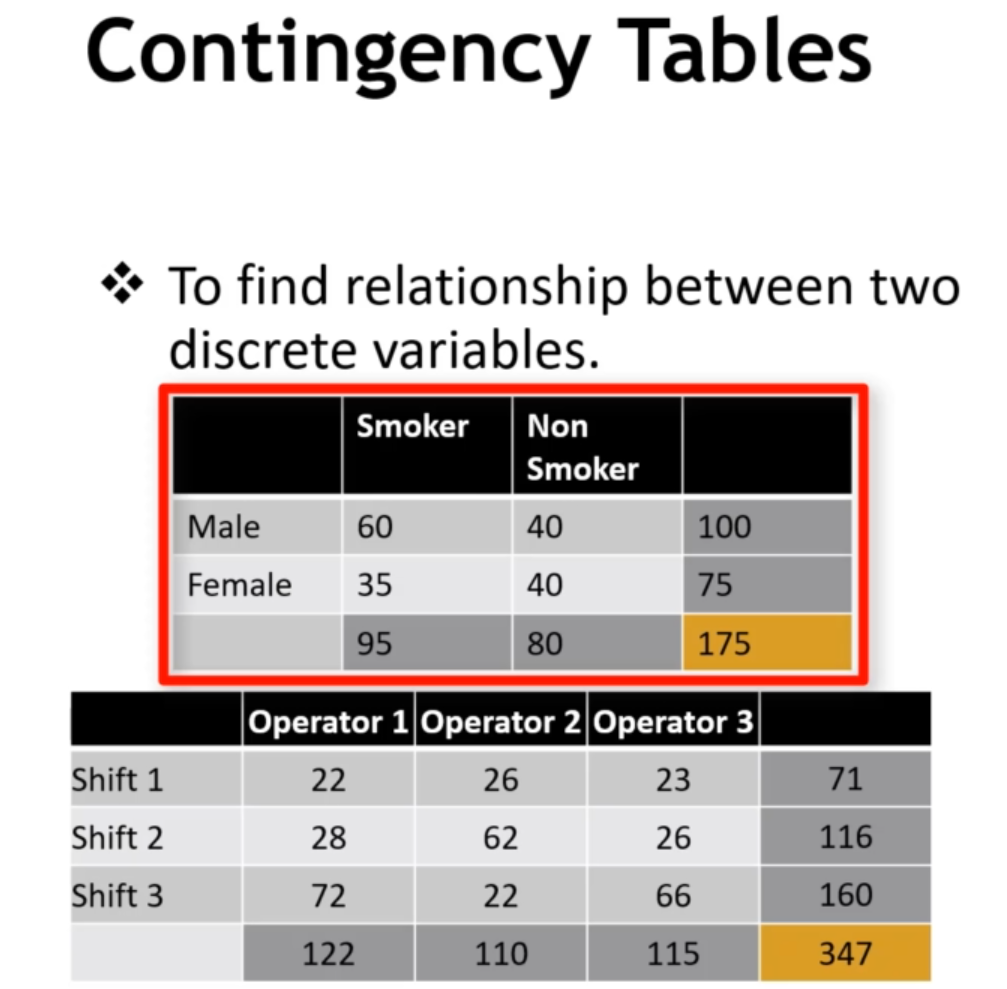

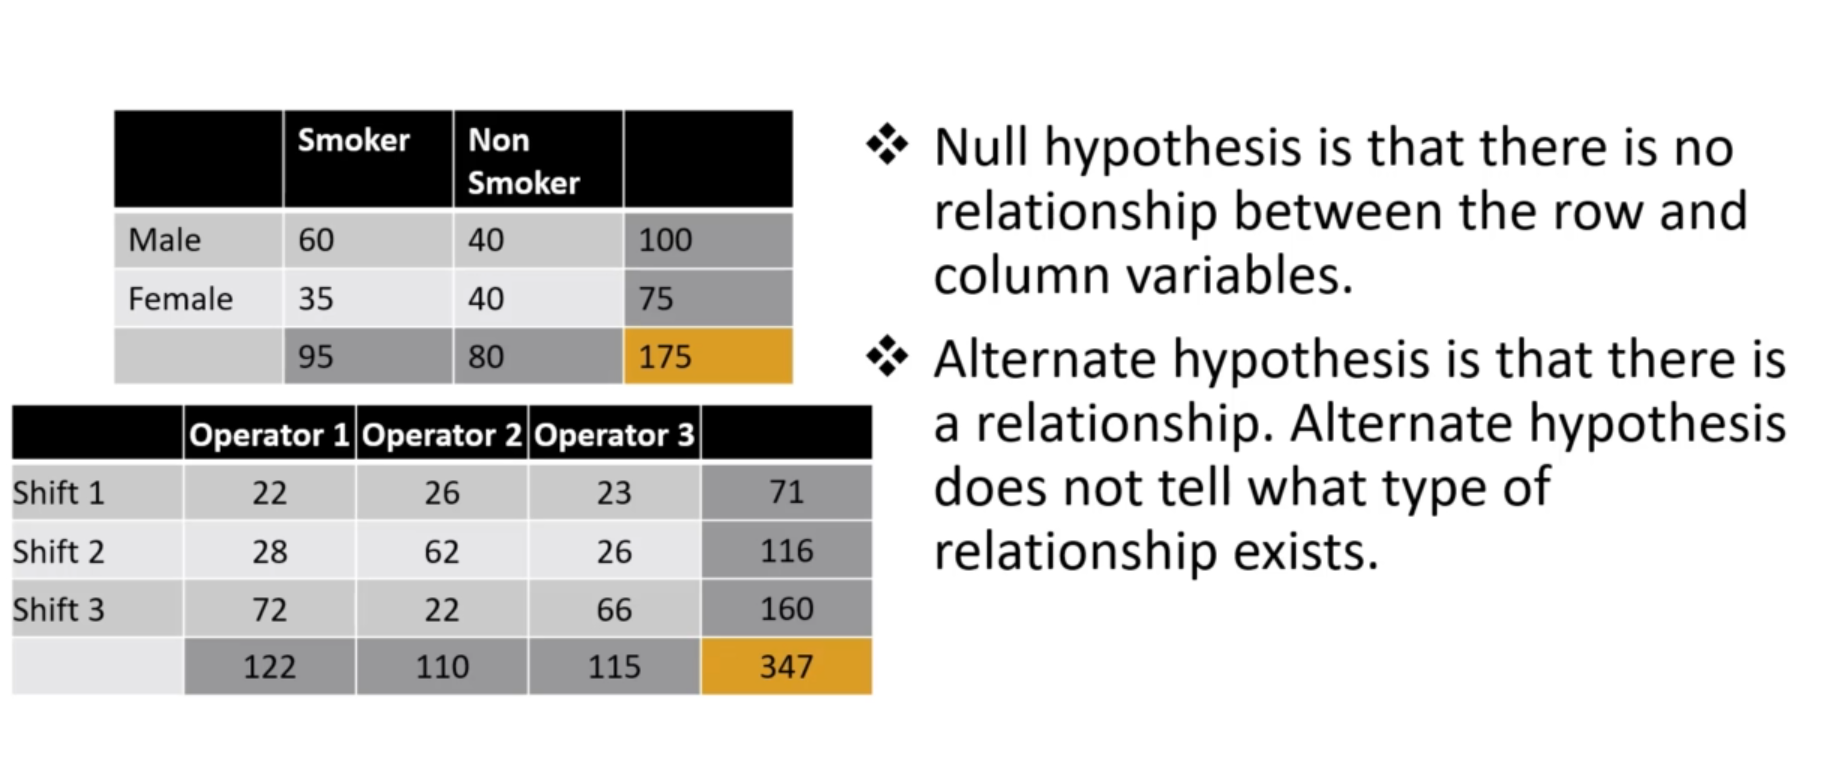

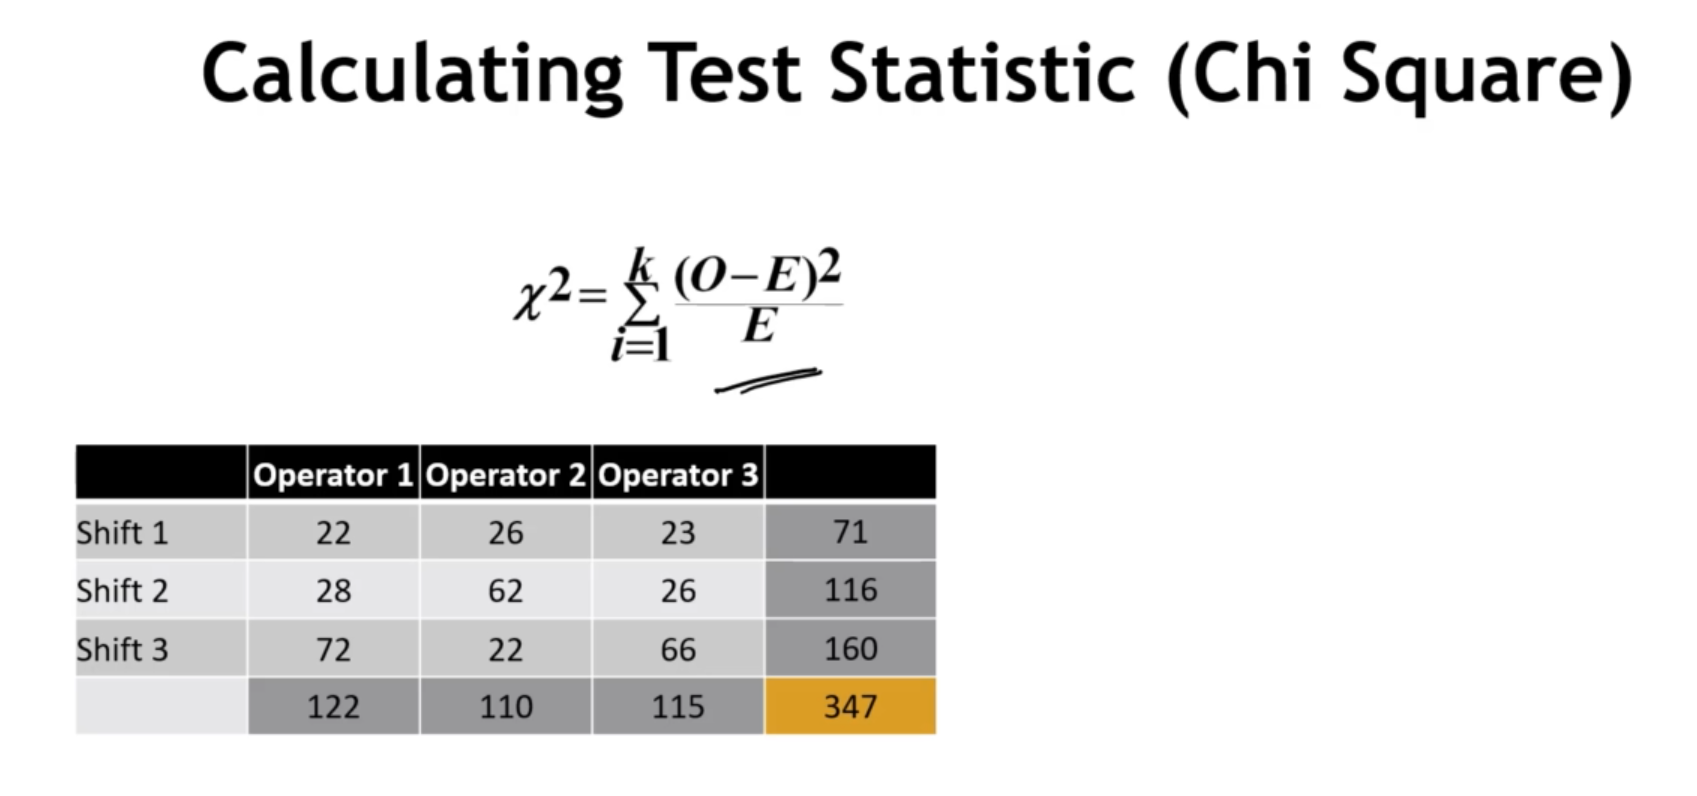

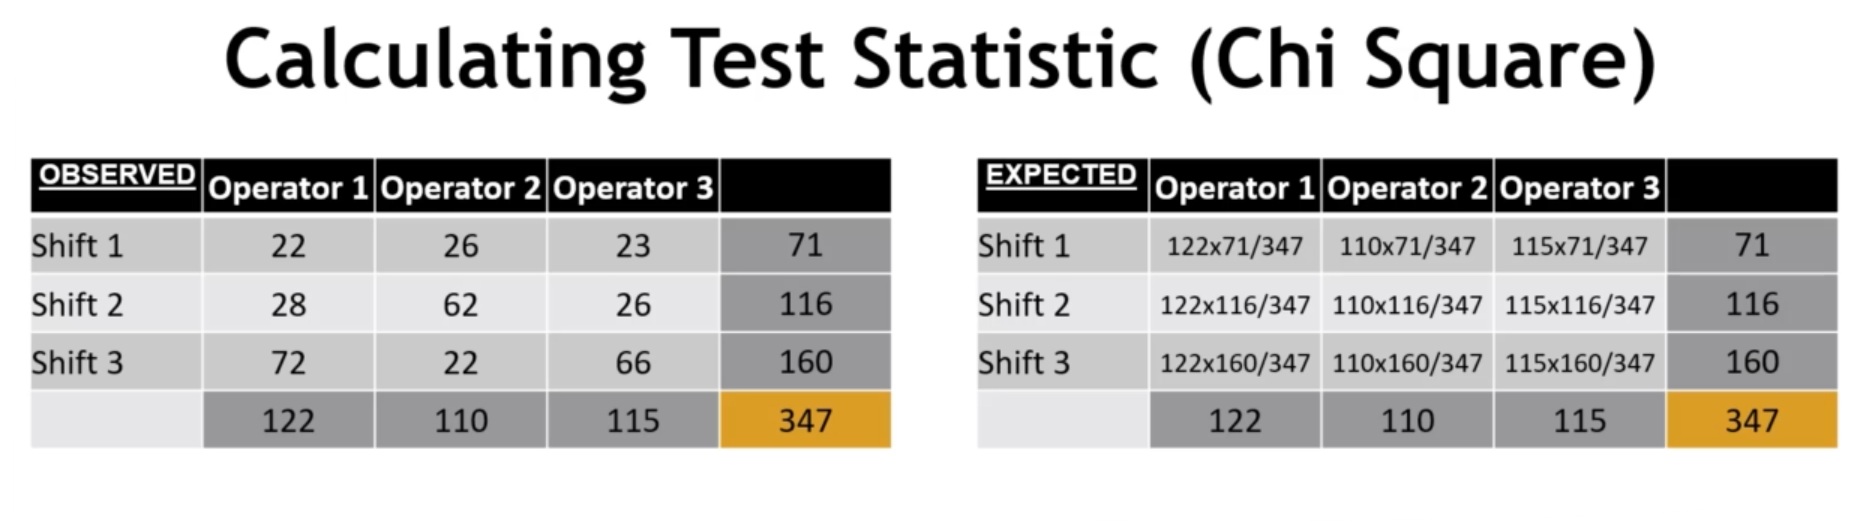

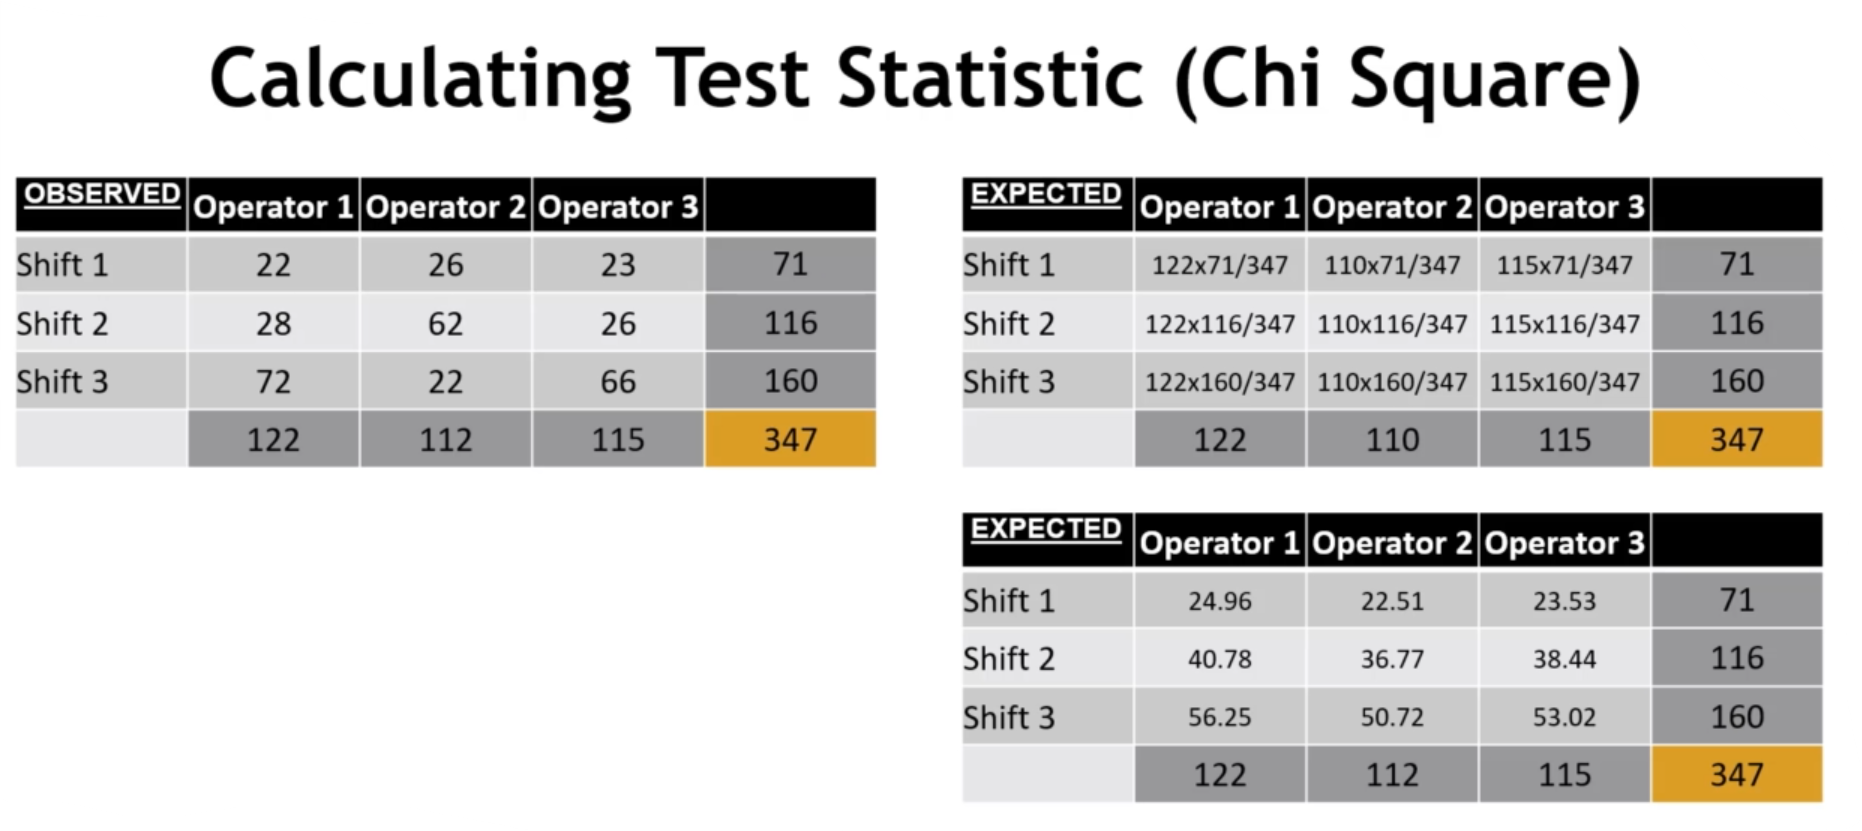

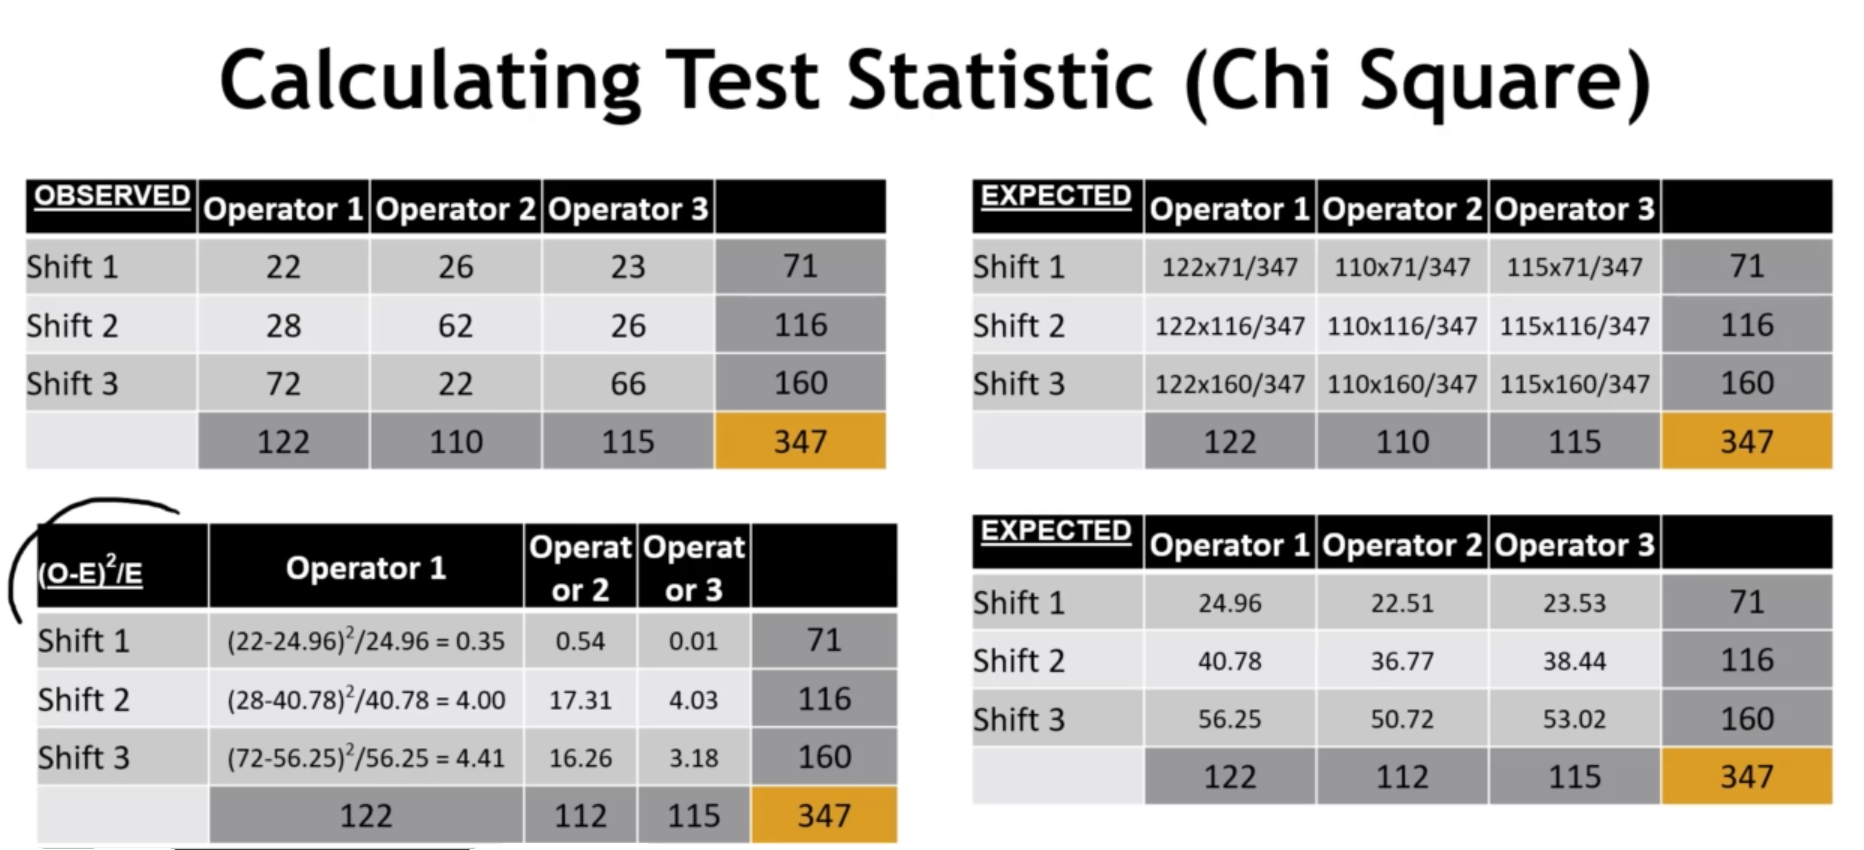

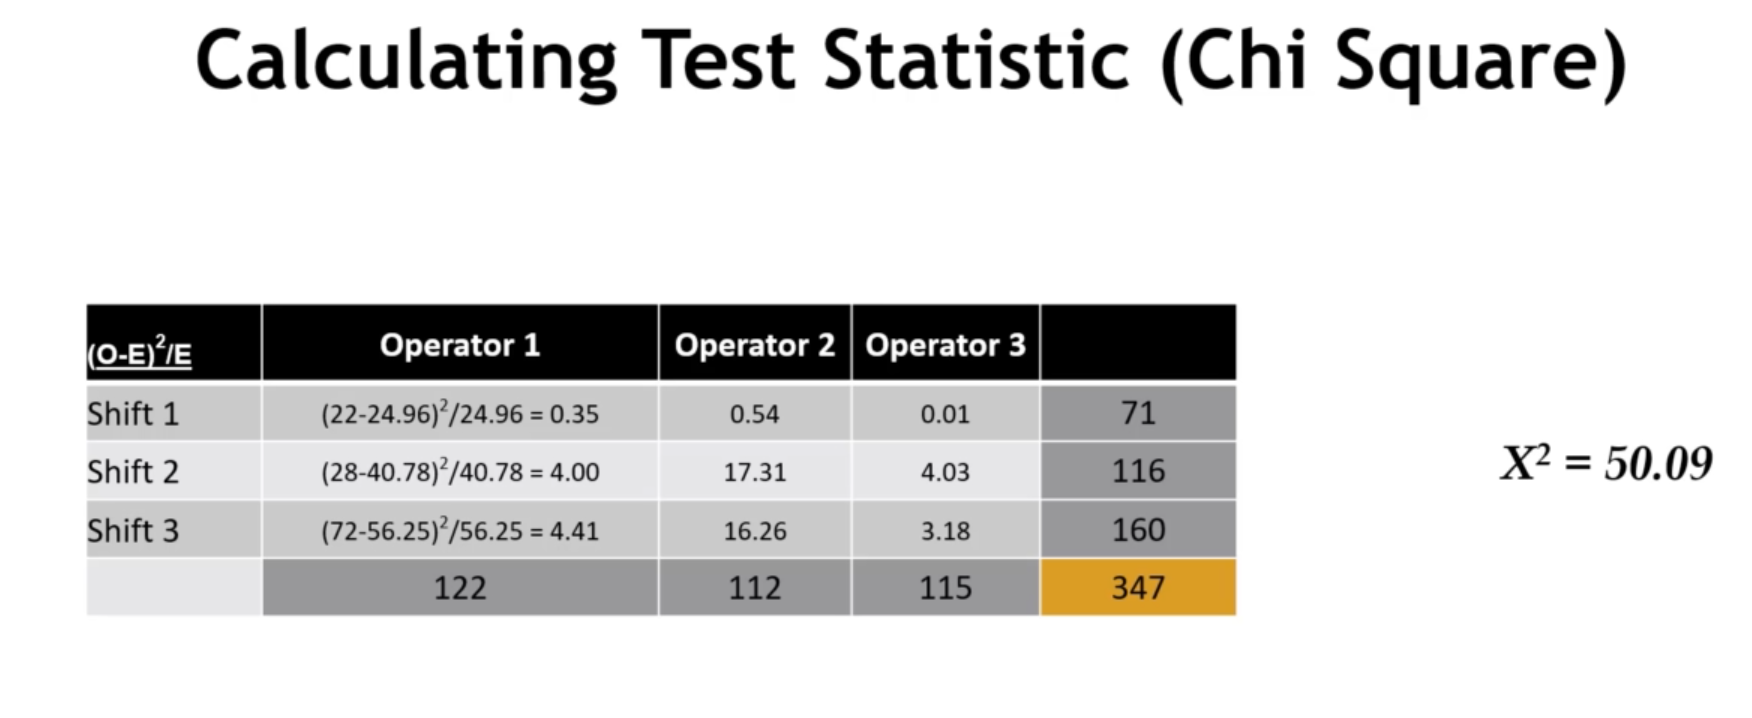

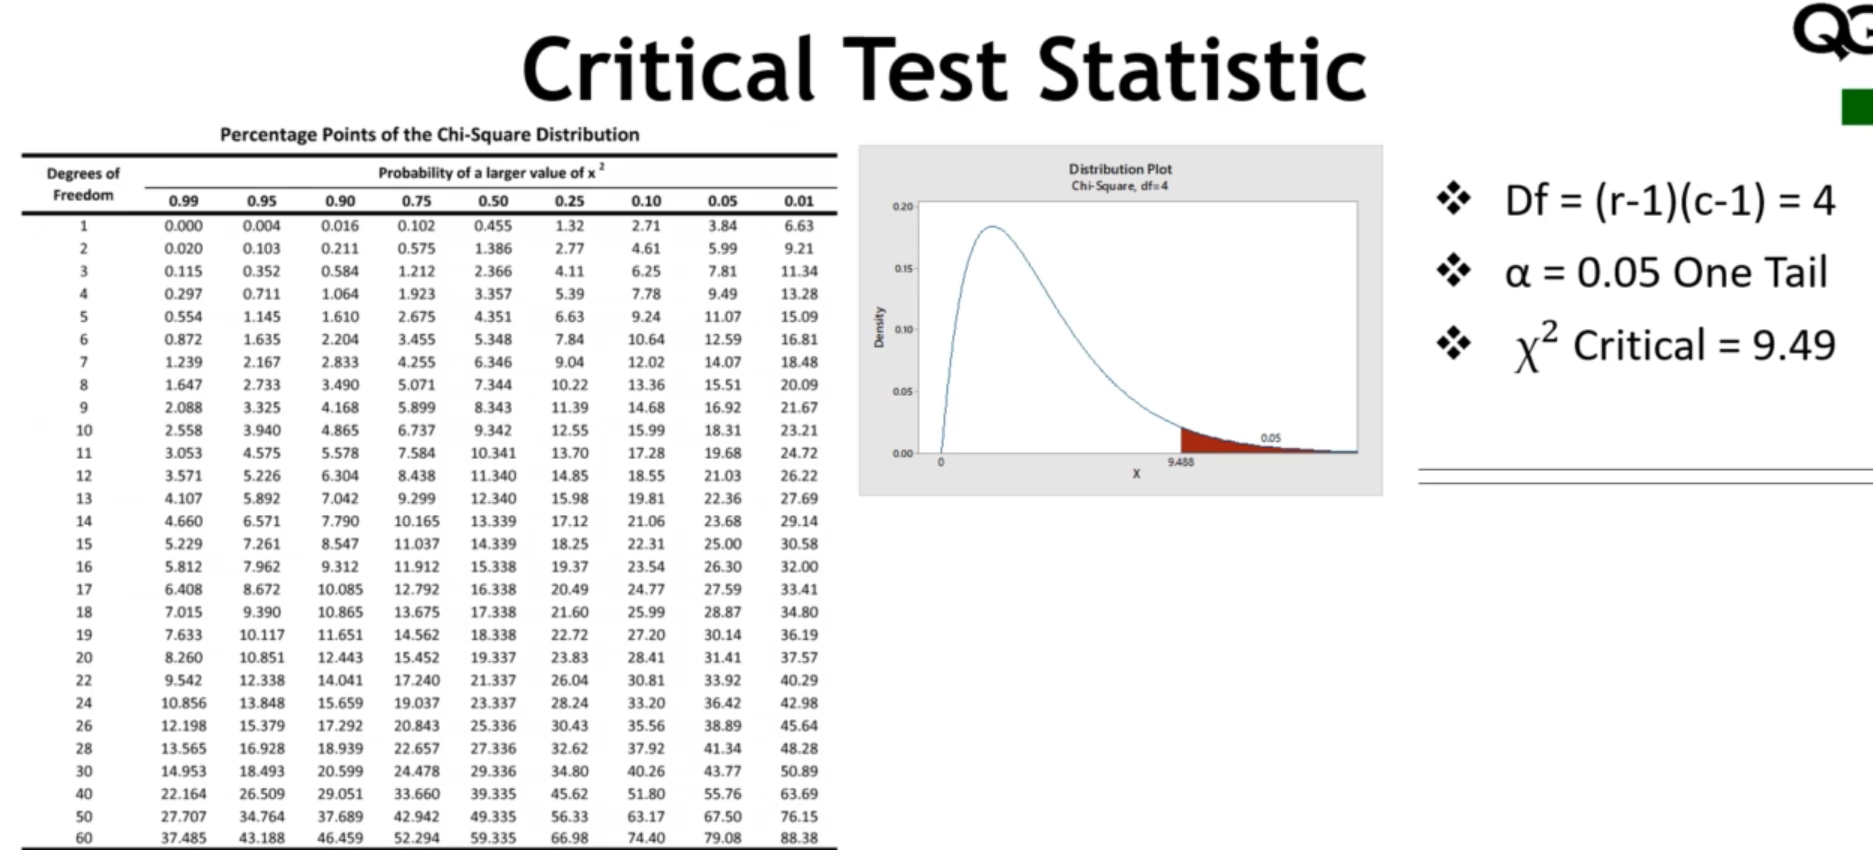

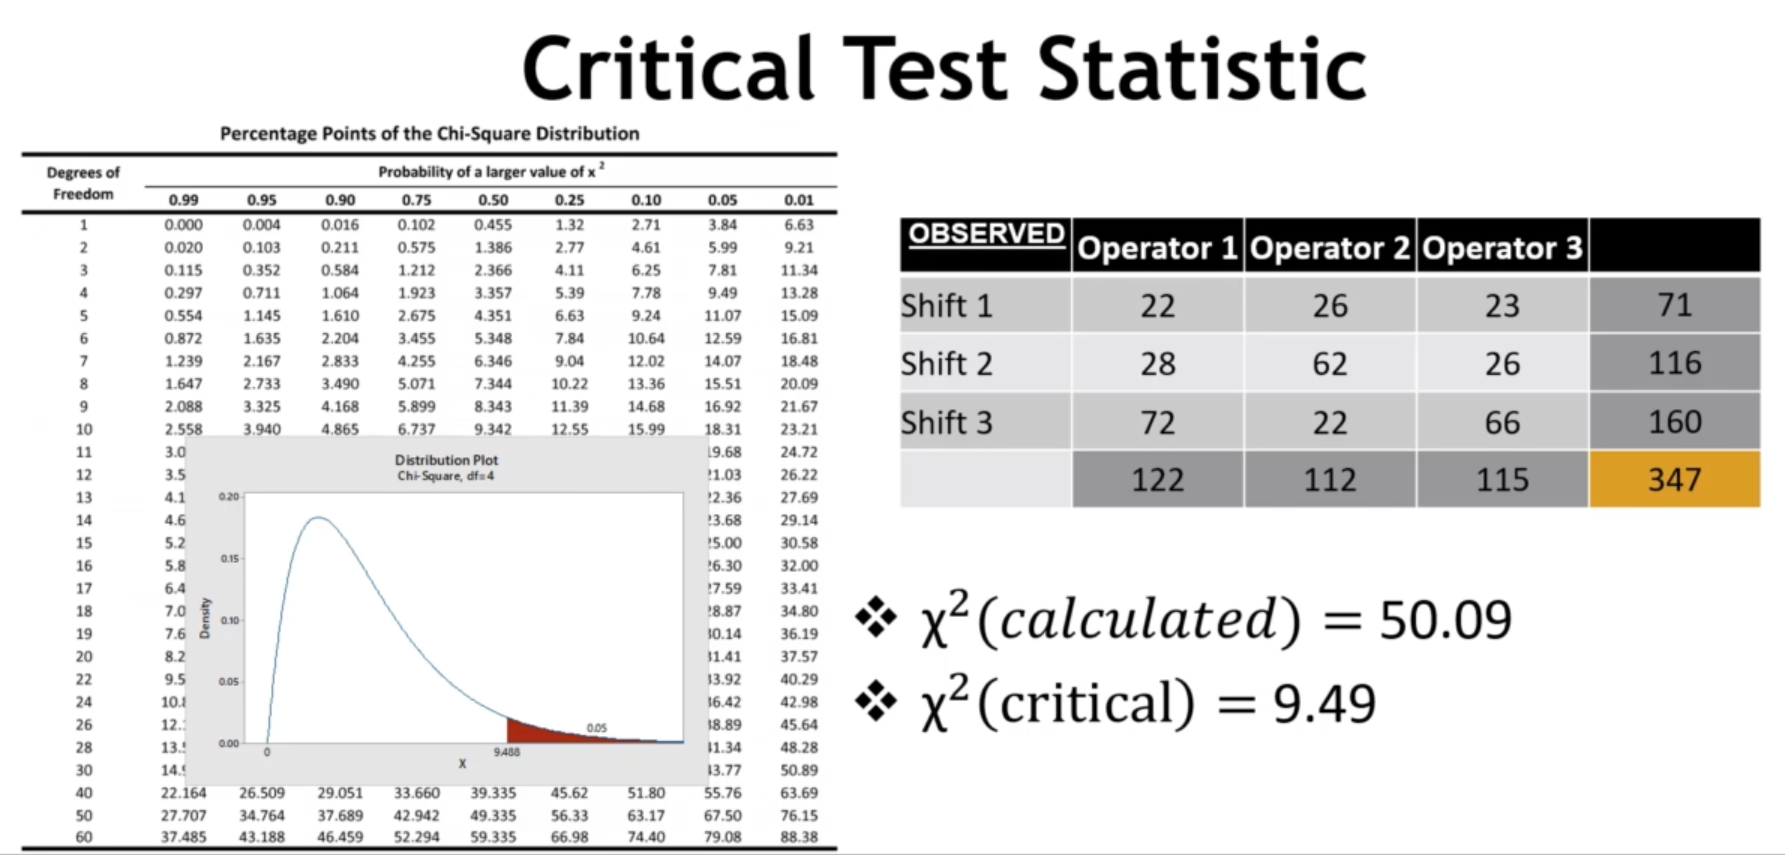

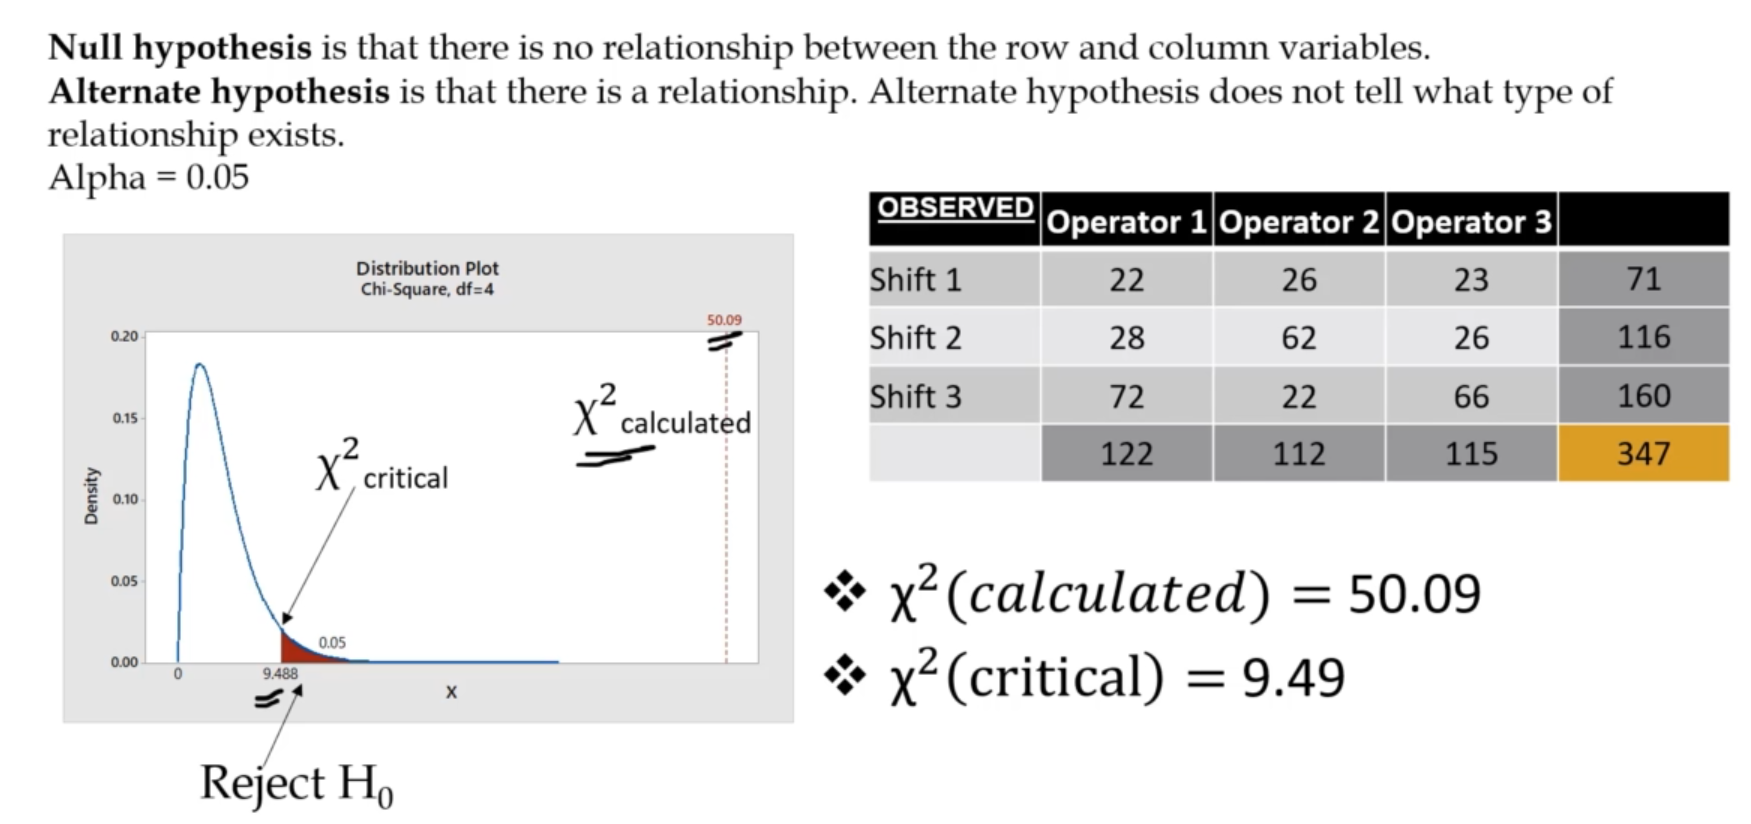

## Contingency Tables using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [9]:
# Method 1
sh_op = np.array([[22,26,23],[28,62,26],[72,22,66]])
sh_op

array([[22, 26, 23],
       [28, 62, 26],
       [72, 22, 66]])

In [7]:
stats.chi2_contingency(observed = sh_op)

(50.09315721064659,
 3.4527076339398545e-10,
 4,
 array([[24.96253602, 22.50720461, 23.53025937],
        [40.78386167, 36.77233429, 38.44380403],
        [56.25360231, 50.7204611 , 53.0259366 ]]))

In [14]:
# Method 2
sh_op_df = pd.DataFrame(sh_op,columns=['Shift1','Shift2','Shift3'],
             index=['Worker1','Worker2','Worker3'])

In [15]:
stats.chi2_contingency(sh_op_df)

(50.09315721064659,
 3.4527076339398545e-10,
 4,
 array([[24.96253602, 22.50720461, 23.53025937],
        [40.78386167, 36.77233429, 38.44380403],
        [56.25360231, 50.7204611 , 53.0259366 ]]))

In [17]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [18]:
tips = sns.load_dataset('tips')

In [20]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Is the percentage of smokers depends on the day? Is there a relationship between day and smokers?

In [40]:
tips.groupby(by=['day','smoker']).count()

total_bill  tip  sex  time  size
day  smoker                                  
Thur Yes             17   17   17    17    17
     No              45   45   45    45    45
Fri  Yes             15   15   15    15    15
     No               4    4    4     4     4
Sat  Yes             42   42   42    42    42
     No              45   45   45    45    45
Sun  Yes             19   19   19    19    19
     No              57   57   57    57    57

In [42]:
day_smoker = tips.pivot_table(index='day',columns='smoker',aggfunc='count')['tip']

In [44]:
stats.chi2_contingency(day_smoker)

(25.787216672396262,
 1.0567572499836523e-05,
 3,
 array([[23.63114754, 38.36885246],
        [ 7.24180328, 11.75819672],
        [33.15983607, 53.84016393],
        [28.96721311, 47.03278689]]))